In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
train = pd.read_excel('C:\\Users\\ruiwa\\Documents\\课件\\NLP\\nlp group\\Git\\dataset\\train_labeled.xlsx')

In [3]:
train.head()

,微博id,微博发布时间,发布人账号,微博中文内容,微博图片,微博视频,情感倾向
0,4456070000000000,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456070000000000,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456050000000000,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456060000000000,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455980000000000,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1


In [4]:
train = train.rename(columns={'微博id': 'ID', '微博发布时间': 'Time', '发布人账号':'User','微博中文内容':'Content',
                        '微博图片':'Pic', '微博视频':'Video','情感倾向':'Sentiment'})
train.head(10)

,ID,Time,User,Content,Pic,Video,Sentiment
0,4456070000000000,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456070000000000,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456050000000000,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456060000000000,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455980000000000,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1
5,4455960000000000,01月01日 16:28,风萧水寒2020,发高烧反反复复，眼睛都快睁不开了。今天室友带我去看，还在发烧中建议我输液，我拒绝了。给我打针...,['https://ww1.sinaimg.cn/thumb150/e7cddf99gy1g...,[],-1
6,4456040000000000,01月01日 21:59,无艳迎春,明天考试今天发烧跨年给我跨坏了？？2兰州·兰州交通大学?,[],[],-1
7,4456070000000000,01月01日 23:53,得意学堂小枇杷,#元旦快乐##枇杷手法小结#每个娃都是有故事的娃。每个大人也是有故事的大人。小枇杷有茶有手法...,['https://ww4.sinaimg.cn/orj360/005OdthOly1gah...,[],0
8,4456060000000000,01月01日 23:00,晓了白了兔,我真的服了xkh昨天vv去和她说自己不舒服，描述了症状她说啊你这不是感冒没有发烧没事的晚上一...,[],[],-1
9,4456060000000000,01月01日 23:19,172的大漂亮,新年第一天，为自己鼓掌??????发烧了也要来看线下演出！因为热爱，所以才会克服困难线上演出...,['https://ww3.sinaimg.cn/thumb150/006aUFAcly1g...,[],1


In [5]:
df = train.copy()
df.head(10)

,ID,Time,User,Content,Pic,Video,Sentiment
0,4456070000000000,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456070000000000,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456050000000000,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456060000000000,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455980000000000,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1
5,4455960000000000,01月01日 16:28,风萧水寒2020,发高烧反反复复，眼睛都快睁不开了。今天室友带我去看，还在发烧中建议我输液，我拒绝了。给我打针...,['https://ww1.sinaimg.cn/thumb150/e7cddf99gy1g...,[],-1
6,4456040000000000,01月01日 21:59,无艳迎春,明天考试今天发烧跨年给我跨坏了？？2兰州·兰州交通大学?,[],[],-1
7,4456070000000000,01月01日 23:53,得意学堂小枇杷,#元旦快乐##枇杷手法小结#每个娃都是有故事的娃。每个大人也是有故事的大人。小枇杷有茶有手法...,['https://ww4.sinaimg.cn/orj360/005OdthOly1gah...,[],0
8,4456060000000000,01月01日 23:00,晓了白了兔,我真的服了xkh昨天vv去和她说自己不舒服，描述了症状她说啊你这不是感冒没有发烧没事的晚上一...,[],[],-1
9,4456060000000000,01月01日 23:19,172的大漂亮,新年第一天，为自己鼓掌??????发烧了也要来看线下演出！因为热爱，所以才会克服困难线上演出...,['https://ww3.sinaimg.cn/thumb150/006aUFAcly1g...,[],1


In [6]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Time       100000 non-null  object
 2   User       99694 non-null   object
 3   Content    99641 non-null   object
 4   Pic        100000 non-null  object
 5   Video      100000 non-null  object
 6   Sentiment  99919 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.0 MB


In [7]:
train.dropna(how = 'all')

,ID,Time,User,Content,Pic,Video,Sentiment
0,4456070000000000,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456070000000000,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456050000000000,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456060000000000,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455980000000000,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1
...,...,...,...,...,...,...,...
99995,4473030000000000,02月17日 19:08,中国教育新闻网,#抗击新型肺炎第一线#【@中国计量大学研制新冠病毒蛋白标准样品】记者从中国计量大学获悉，新型...,['https://ww1.sinaimg.cn/orj360/682cebefly1gbz...,[],0
99996,4472970000000000,02月17日 14:53,fuzhuoting,1、类RaTG13病毒（一种从云南蝙蝠身上分离出来的冠状病毒）可能是2019-nCoV的源头...,[],[],0
99997,4473040000000000,02月17日 19:18,蝌蚪五线谱,#微博辟谣#没有证据表明，吃大蒜、漱口水、涂抹芝麻油、生理盐水洗鼻子等手段可以防止感染新型冠...,['https://ww4.sinaimg.cn/orj360/6d2cc4e6ly1gbz...,[],0
99998,4472950000000000,02月17日 13:40,医库,【新冠疫情最受关注的十一篇英文核心期刊论文全解析】本文整理了关于新型冠状病毒最受关注的十一篇...,[],[],1


In [8]:
train['ID'].value_counts()

4465130000000000    949
4466580000000000    841
4469840000000000    837
4463680000000000    829
4472740000000000    818
                   ... 
4469550000000000      1
4463370000000000      1
4459040000000000      1
4464490000000000      1
4460100000000000      1
Name: ID, Length: 1760, dtype: int64

In [9]:
train = train.drop_duplicates(['ID'])
train['ID'].value_counts()

4459610000000000    1
4470970000000000    1
4461900000000000    1
4470730000000000    1
4461940000000000    1
                   ..
4465010000000000    1
4456240000000000    1
4465050000000000    1
4456280000000000    1
4459630000000000    1
Name: ID, Length: 1760, dtype: int64

Text(0.5, 1.0, 'sentiment(target)')

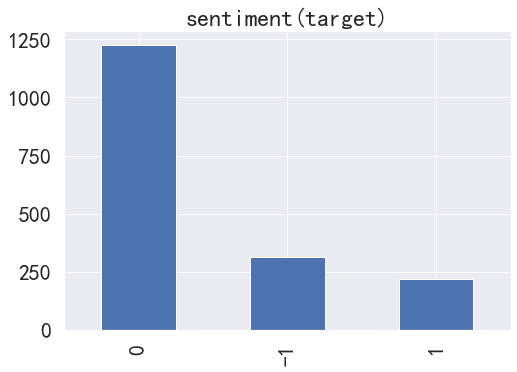

In [10]:
train = train[train['Sentiment'].isin([0,1,-1])]
train['Sentiment'].value_counts().plot.bar()
plt.title('sentiment(target)')

In [11]:
train.Time = pd.to_datetime('2020年'+train.Time,errors='coerce', format='%Y年%m月%d日 %H:%M')
train.head()

,ID,Time,User,Content,Pic,Video,Sentiment
0,4456070000000000,2020-01-01 23:50:00,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
2,4456050000000000,2020-01-01 22:39:00,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456060000000000,2020-01-01 23:08:00,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455980000000000,2020-01-01 17:42:00,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1
5,4455960000000000,2020-01-01 16:28:00,风萧水寒2020,发高烧反反复复，眼睛都快睁不开了。今天室友带我去看，还在发烧中建议我输液，我拒绝了。给我打针...,['https://ww1.sinaimg.cn/thumb150/e7cddf99gy1g...,[],-1


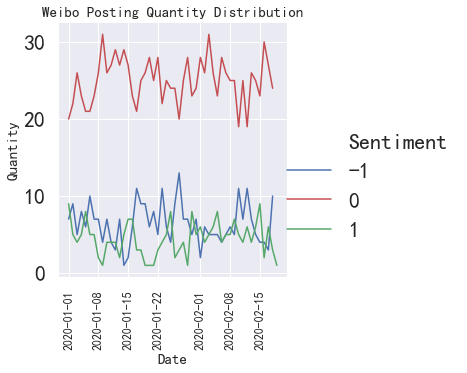

In [24]:
train['date'] = train['Time'].dt.date

date_influence = train.groupby(['date','Sentiment'],as_index=False).count()

sns.relplot(x="date", y="ID", kind="line", hue='Sentiment',palette=["b", "r",'g'],data=date_influence)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Quantity',fontsize=15)
plt.title('Weibo Posting Quantity Distribution',fontsize=15)
plt.show()


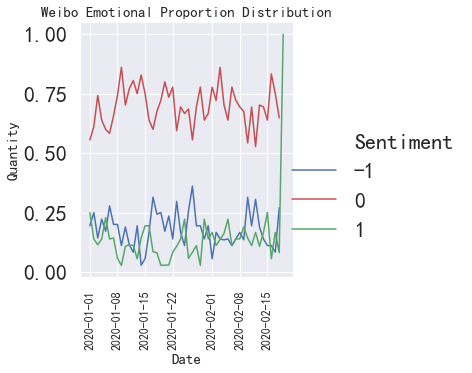

In [21]:
date_influence = date_influence.merge(train.groupby('date',as_index=False)['Sentiment'].count().rename(columns={'Sentiment':'weibo_count'}),how='left',on='date')

date_influence['weibo_rate'] = date_influence['ID']/date_influence['weibo_count']

sns.relplot(x="date", y="weibo_rate", kind="line", hue='Sentiment',palette=["b", "r",'g'],data=date_influence)
plt.xticks(rotation=100,fontsize=12)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Quantity',fontsize=15)
plt.title('Weibo Emotional Proportion Distribution',fontsize=15)
plt.show()
